In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 如果希望每次运行得到相同结果，可以设置随机种子
np.random.seed(42)

# ---------------------
# 1. 生成内部高密度点集
# ---------------------
N_center = 300  # 内圈点数，可根据需要自行调整

# 随机产生角度（0 ~ 2π）和半径（0 ~ 1）
angles_center = np.random.uniform(0, 2*np.pi, N_center)
r_center = np.random.uniform(0, 1, N_center)

# 极坐标 -> 笛卡尔坐标
lat_center = r_center * np.sin(angles_center)
lon_center = r_center * np.cos(angles_center)

# 根据 lon 的正负划分左右两半，并赋予不同范围的 meg
meg_center = np.zeros(N_center, dtype=int)
for i in range(N_center):
    if lon_center[i] >= 0:
        # 右半，meg ∈ [10,15]
        meg_center[i] = np.random.randint(20, 30)
    else:
        # 左半，meg ∈ [1,3]
        meg_center[i] = np.random.randint(1, 4)

# 将内圈数据暂存为 DataFrame
df_center = pd.DataFrame({
    'lat': lat_center,
    'lon': lon_center,
    'meg': meg_center
})

# ---------------------
# 2. 生成外围低密度圆环
# ---------------------
N_ring = 250   # 外圈点数，可根据需要自行调整
N_arc = N_ring // 3  # 这里简单地按三个扇区平均分配

# 准备存储外圈所有点
lat_ring_all = []
lon_ring_all = []
meg_ring_all = []

def generate_arc_data(n_points, angle_start, angle_end, meg_low, meg_high):
    """在给定扇区 (angle_start, angle_end) 和 meg 范围内生成 n_points 个点。"""
    angles = np.random.uniform(angle_start, angle_end, n_points)
    r = np.random.uniform(3, 4, n_points)  # 外环半径在 [3,4]
    lat_ring = r * np.sin(angles)
    lon_ring = r * np.cos(angles)
    meg_ring = np.random.randint(meg_low, meg_high + 1, n_points)
    return lat_ring, lon_ring, meg_ring

# 扇区 1：角度 [0, 2π/3], meg ∈ [1, 3]
lat_arc1, lon_arc1, meg_arc1 = generate_arc_data(N_arc, 0, 2*np.pi/3, 40, 45)
lat_ring_all.append(lat_arc1)
lon_ring_all.append(lon_arc1)
meg_ring_all.append(meg_arc1)

# 扇区 2：角度 [2π/3, 4π/3], meg ∈ [10, 13]
lat_arc2, lon_arc2, meg_arc2 = generate_arc_data(N_arc, 2*np.pi/3, 4*np.pi/3, 10, 13)
lat_ring_all.append(lat_arc2)
lon_ring_all.append(lon_arc2)
meg_ring_all.append(meg_arc2)

# 扇区 3：角度 [4π/3, 2π], meg ∈ [25, 30]
# 注意如果 N_ring 不是 3 的整倍数，最后一个扇区可以多放一些点
N_arc3 = N_ring - 2*N_arc
lat_arc3, lon_arc3, meg_arc3 = generate_arc_data(N_arc3, 4*np.pi/3, 2*np.pi, 25, 30)
lat_ring_all.append(lat_arc3)
lon_ring_all.append(lon_arc3)
meg_ring_all.append(meg_arc3)

# 合并外圈三段
lat_ring_all = np.concatenate(lat_ring_all)
lon_ring_all = np.concatenate(lon_ring_all)
meg_ring_all = np.concatenate(meg_ring_all)

df_ring = pd.DataFrame({
    'lat': lat_ring_all,
    'lon': lon_ring_all,
    'meg': meg_ring_all
})

# ---------------------
# 3. 合并内圈与外圈数据
# ---------------------
df = pd.concat([df_center, df_ring], ignore_index=True)


# 预览前几行
print(df.head(10))
print("总数据量:", len(df))

# 如果需要，将 df 保存为 CSV
# df.to_csv("data_distribution.csv", index=False)


        lat       lon  meg
0  0.036650 -0.036439    1
1 -0.161928  0.506080   21
2 -0.537179 -0.061035    2
3 -0.370312 -0.518831    1
4  0.603136  0.404272   25
5  0.810520  0.543456   24
6  0.184269  0.482298   25
7 -0.240668  0.215359   20
8 -0.471894 -0.640029    1
9 -0.261489 -0.070525    1
总数据量: 550


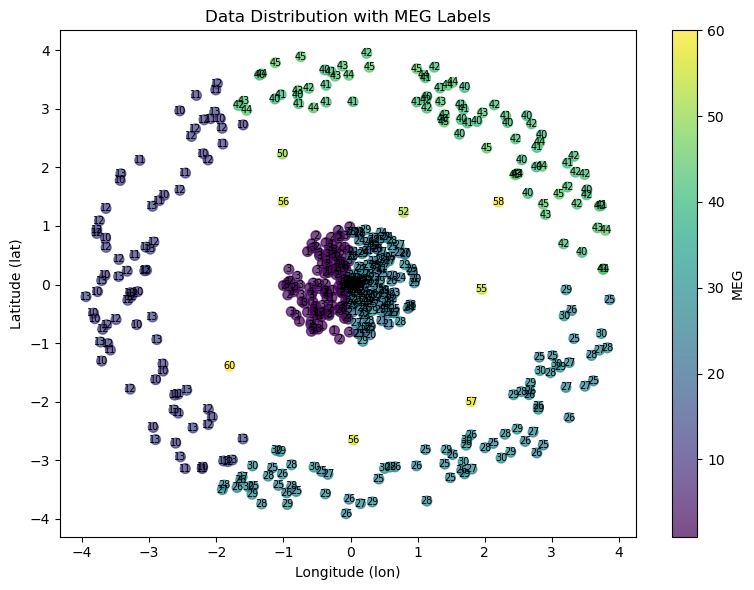

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------
# 以下假设 df 已经生成
# 如果没有，可直接复用之前生成 df 的代码
# ---------------------
# df = ...

# 创建一个绘图窗口
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制散点图：
#   x轴 -> lon
#   y轴 -> lat
#   点的颜色使用 meg 的数值(连续或离散都行，这里选择连续渐变), alpha 设置为 0.7 让颜色半透明
scatter = ax.scatter(df['lon'], df['lat'], 
                     c=df['meg'],       # 用meg来指定颜色
                     cmap='viridis',    # 可以换成喜欢的colormap，如 'jet'
                     s=50,              # 点的大小
                     alpha=0.7)

# 在每个点上方标记 meg 的数值
# 注意：如果数据量过大，标注会非常拥挤，可根据需要筛选/缩放字体
for i in range(len(df)):
    ax.text(df['lon'].iloc[i], 
            df['lat'].iloc[i], 
            str(df['meg'].iloc[i]),
            fontsize=7,              # 字体大小，可根据需要调整
            ha='center', va='center',
            color='black')

# 添加颜色条（显示meg的取值范围）
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('MEG')

# 设置坐标轴标签和标题
ax.set_xlabel('Longitude (lon)')
ax.set_ylabel('Latitude (lat)')
ax.set_title('Data Distribution with MEG Labels')

# 显示图像
plt.tight_layout()
plt.show()


In [421]:
import numpy as np
from sklearn.neighbors import KDTree

# 人为定义的参数 l
l = 20
# how to find the best l value
# 删除重复点（如果有）
#df2 = df1.drop_duplicates().reset_index(drop=True)
#df2 = df1
# 提取坐标数据
coordinates = df[['lat', 'lon']].to_numpy()

# 构建 KDTree
tree = KDTree(coordinates)

# 查询每个点的最近 l 个点的距离（包括自身）
distances, _ = tree.query(coordinates, k=min(l+1, len(df)))  # 确保 k 不超过点数

# 排除自身距离（第一个为0）
nearest_distances = distances[:, 1:]

# 计算最近 l 个点距离的平均值
average_distances = np.mean(nearest_distances, axis=1)

# 计算最近 l 个点中的最大距离
max_distances = np.max(nearest_distances, axis=1)

# 将结果附加到原始数据中
df['l-density'] = average_distances
df['dist'] = max_distances

df.index.name = 'Index'
# 检查结果
df


,lat,lon,meg,l-density,dist
Index,,,,,
0,0.036650,-0.036439,1,0.051788,0.065928
1,-0.161928,0.506080,21,0.176068,0.267469
2,-0.537179,-0.061035,2,0.190600,0.276567
3,-0.370312,-0.518831,1,0.175401,0.269106
4,0.603136,0.404272,25,0.183638,0.261541
...,...,...,...,...,...
553,2.227033,-1.015864,50,1.030217,1.235916
554,-2.000529,1.796102,57,0.865260,1.059454
555,-0.081917,1.955544,55,1.228127,1.362322


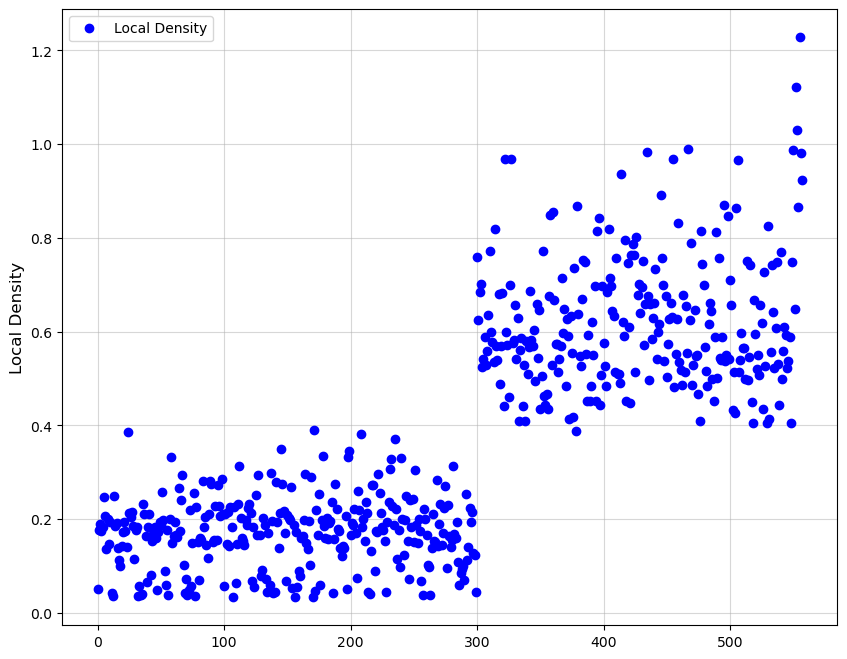

In [422]:
average_distance = df['l-density']

# 绘制折线图
plt.figure(figsize=(10, 8))
plt.plot(average_distance.values, marker='o', linestyle='None', color='b', label='Local Density')
#plt.title('Average Distance Plot', fontsize=16)
plt.ylabel('Local Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [423]:
# 按平均值从小到大排序
sorted_df = df.sort_values(by='l-density')
sorted_df

,lat,lon,meg,l-density,dist
Index,,,,,
107,-0.010831,0.000378,26,0.033378,0.060942
156,-0.010022,-0.005336,2,0.033911,0.060154
170,-0.010917,-0.005343,3,0.033945,0.059281
32,0.005721,0.013208,27,0.035073,0.057074
12,-0.022025,0.012552,20,0.035917,0.058880
...,...,...,...,...,...
550,1.411122,-1.006043,56,0.987430,1.124385
467,-0.257730,3.863196,25,0.989623,1.438449
553,2.227033,-1.015864,50,1.030217,1.235916


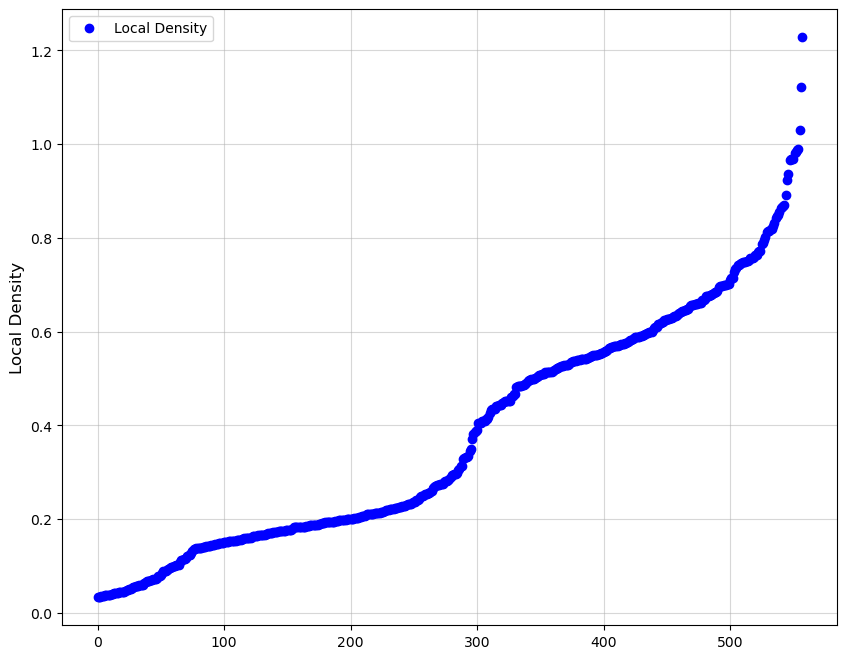

In [424]:
average_distance = sorted_df['l-density']

# 绘制折线图
plt.figure(figsize=(10, 8))
plt.plot(average_distance.values, marker='o', linestyle='None', color='b', label='Local Density')
#plt.title('Average Distance Plot', fontsize=16)
plt.ylabel('Local Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


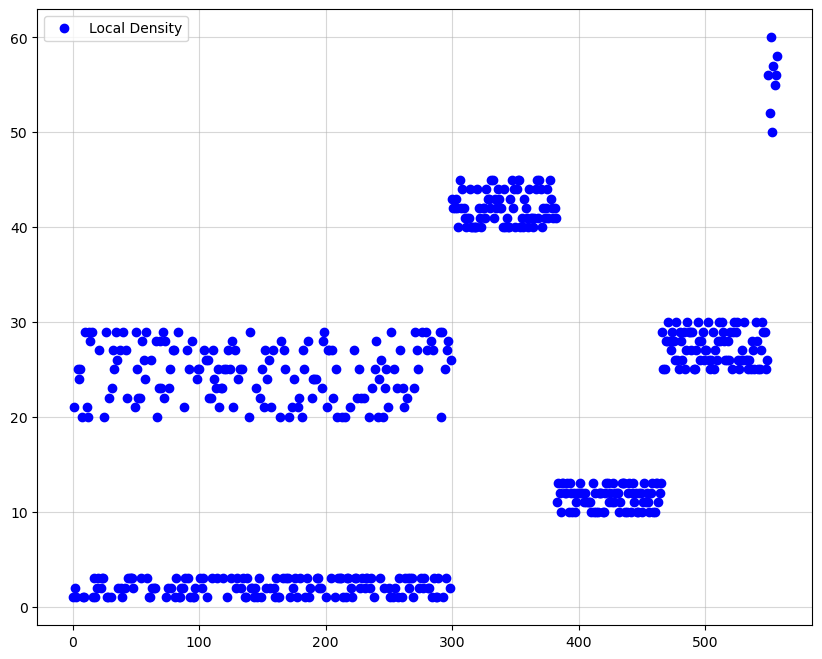

In [425]:
average_distance = df['meg']

# 绘制折线图
plt.figure(figsize=(10, 8))
plt.plot(average_distance.values, marker='o', linestyle='None', color='b', label='Local Density')
#plt.title('Average Distance Plot', fontsize=16)
#plt.ylabel('Local Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [426]:
from sklearn.cluster import KMeans

# 提取用于聚类的数据
X = df[['l-density']].values

# 定义聚类的簇数 k
k = 2  # 可根据需求调整

# 执行 K-means 聚类
kmeans = KMeans(n_clusters=k, random_state=42)
df['P_Cluster'] = kmeans.fit_predict(X)  + 1

# 显示带有聚类结果的 DataFrame
df
#df2['P_Cluster'].max() 

,lat,lon,meg,l-density,dist,P_Cluster
Index,,,,,,
0,0.036650,-0.036439,1,0.051788,0.065928,1
1,-0.161928,0.506080,21,0.176068,0.267469,1
2,-0.537179,-0.061035,2,0.190600,0.276567,1
3,-0.370312,-0.518831,1,0.175401,0.269106,1
4,0.603136,0.404272,25,0.183638,0.261541,1
...,...,...,...,...,...,...
553,2.227033,-1.015864,50,1.030217,1.235916,2
554,-2.000529,1.796102,57,0.865260,1.059454,2
555,-0.081917,1.955544,55,1.228127,1.362322,2


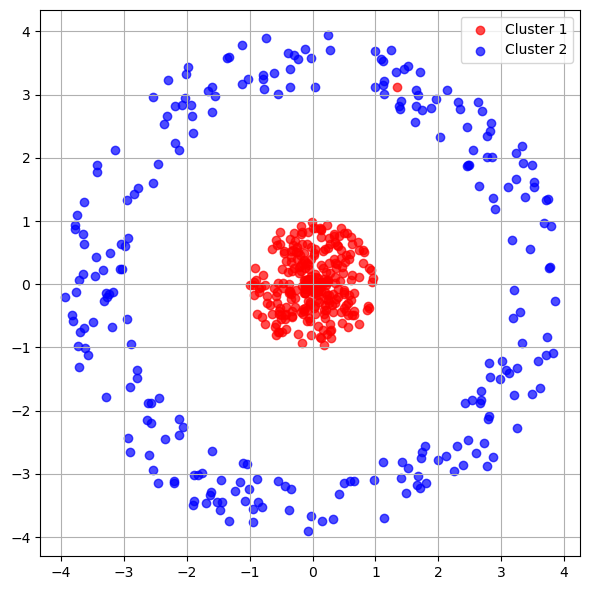

In [411]:
# 可视化过滤后的点，按照 Cluster 不同着色

# 分别获取不同 Cluster 的点
cluster_1 = df[df['P_Cluster'] == 1]
cluster_2 = df[df['P_Cluster'] == 2]
#cluster_3 = df[df['P_Cluster'] == 3]

# 绘图
plt.figure(figsize=(6, 6))
plt.scatter(cluster_1['lon'], cluster_1['lat'], color='red', label='Cluster 1', alpha=0.7)
plt.scatter(cluster_2['lon'], cluster_2['lat'], color='blue', label='Cluster 2', alpha=0.7)
#plt.scatter(cluster_3['lon'], cluster_3['lat'], color='green', label='Cluster 3', alpha=0.7)

# 图表细节
plt.legend()
plt.grid(True)
plt.tight_layout()

# 显示图表
plt.show()

In [399]:
import numpy as np

UNASSIGNED = -99  # unvisted
NOISE = -1        # niose

class STDBSCAN:
    def __init__(self, eps2, min_samples):
        """
        初始化 ST-DBSCAN 的参数
        :param eps2: 时间距离的最大差值（如秒、分钟等）
        :param min_samples: 构成核心点的最小点数（包括核心点本身）
        """
        self.eps2 = eps2
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X, T, DL, Rad):
        """
        对数据集 X 和时间序列 T 应用 ST-DBSCAN 算法
        :param X: 空间数据集，形状为 (n_samples, n_features)
        :param T: 时间序列，形状为 (n_samples,)
        :param DL: 每个点的密度等级
        :param Rad: 每个点的邻域半径
        """
        n_samples = X.shape[0]
        # 将所有点设置为 UNASSIGNED 而不是 -1
        self.labels_ = np.full(n_samples, UNASSIGNED)
        
        cluster_id = 0  # 初始化簇 ID

        for i in range(n_samples):
            # 如果这个点不是 UNASSIGNED，说明已经访问过或被归到某个簇/标记为噪声
            if self.labels_[i] != UNASSIGNED:
                continue

            # 获取这个点对应的半径和密度等级
            rad = Rad[i]
            dl = DL[i]
            neighbors = self._region_query(X, T, i, rad, dl, DL)

            # 如果邻域不足 min_samples，则标记为噪声
            if len(neighbors) < self.min_samples:
                self.labels_[i] = NOISE
            else:
                # 否则，扩展一个新的簇
                self._expand_cluster(X, T, i, neighbors, cluster_id, DL, Rad)
                cluster_id += 1

    def _region_query(self, X, T, point_idx, rad, dl, DL):
        """
        找到某点的邻域，基于空间和时间特征进行过滤。
        
        :param X: 空间数据集，形状为 (n_samples, n_features)
        :param T: 时间序列，形状为 (n_samples,)
        :param point_idx: 目标点的索引
        :param rad: 当前点的邻域半径
        :param dl: 当前点的密度等级
        :param DL: 全体点的密度等级
        :return: 邻域内点的索引列表
        """
        neighbors = []
        for i in range(X.shape[0]):
            spatial_dist = np.linalg.norm(X[point_idx] - X[i])
            temporal_dist = abs(T[point_idx] - T[i])
            # 条件：时间距离满足 eps2，且密度等级相等，空间距离小于等于 rad
            if temporal_dist <= self.eps2 and dl == DL[i] and spatial_dist <= rad:
                neighbors.append(i)
        #print (neighbors)
        return neighbors

    def _expand_cluster(self, X, T, point_idx, neighbors, cluster_id, DL, Rad):
        """
        从核心点扩展簇，加入所有密度可达的点
        :param X: 空间数据集
        :param T: 时间序列
        :param point_idx: 当前核心点的索引
        :param neighbors: 当前点的邻域点索引列表
        :param cluster_id: 当前簇的 ID
        :param DL: 全体点的密度等级
        :param Rad: 全体点的邻域半径
        """
        # 在进入函数前已经检查过min_samples
        # 先把核心点标记成当前簇
        self.labels_[point_idx] = cluster_id

        # 将列表转为 set，方便动态更新
        neighbors_set = set(neighbors)

        # 用于迭代 neighbors_set 的游标（手动模拟“队列”）
        i = 0
        # 注意：neighbors_set 的大小在迭代过程中可能动态变化
        while i < len(neighbors_set):
            # 获取当前 neighbor 的索引
            neighbor_idx = list(neighbors_set)[i]

            # 如果它还没被访问过(UNASSIGNED)或者是NOISE，都可以“翻案”成簇成员
            if self.labels_[neighbor_idx] == UNASSIGNED or self.labels_[neighbor_idx] == NOISE:
                self.labels_[neighbor_idx] = cluster_id

            # 进一步检查这个邻居是不是核心点
            # （只有在它还是 UNASSIGNED 或者刚从 NOISE 翻案过来时，才去查）
            #if self.labels_[neighbor_idx] == cluster_id and DL[neighbor_idx] == DL[point_idx]:
            if self.labels_[neighbor_idx] == cluster_id:
                # 获取该邻居点的半径和密度等级
                n_rad = Rad[neighbor_idx]
                n_dl = DL[neighbor_idx]
                n_neighbors = self._region_query(X, T, neighbor_idx, n_rad, n_dl, DL)

                # 如果这个点的邻域也满足核心点条件，则把新邻域并入 neighbors_set
                if len(n_neighbors) >= self.min_samples:
                    neighbors_set.update(n_neighbors)

            i += 1
    

In [378]:
DL = df['P_Cluster']
DL

Index
0      1
1      1
2      1
3      1
4      1
      ..
545    2
546    2
547    2
548    2
549    2
Name: P_Cluster, Length: 550, dtype: int32

In [379]:
Rad = df["dist"]
Rad

Index
0      0.194402
1      0.441201
2      0.468441
3      0.487260
4      0.565881
         ...   
545    2.397106
546    2.390576
547    2.215382
548    2.785280
549    2.574104
Name: dist, Length: 550, dtype: float64

In [380]:
X = df[['lat', 'lon']].to_numpy()  # 将空间坐标转换为 NumPy 数组，形状为 (n_samples, 2)
X

array([[ 0.03664994, -0.03643875],
       [-0.1619279 ,  0.50608013],
       [-0.53717885, -0.06103457],
       ...,
       [-2.84981438, -1.04877614],
       [-3.4455181 , -1.44537368],
       [-3.6637371 , -0.02222806]])

In [381]:
T = df['meg'].to_numpy()  # 将时间戳列转换为 NumPy 数组，形状为 (n_samples,)
T

array([ 1, 21,  2,  1, 25, 24, 25, 20,  1,  1, 29, 21, 20, 29, 28, 29,  1,
        3,  1,  2,  3, 27,  2,  3,  3, 20, 29,  1,  1, 22,  1, 23, 27, 25,
       29, 26,  2, 27,  2,  1, 29,  2, 27, 22,  3,  3,  3,  3,  2, 21, 29,
       25, 22, 22,  3, 28, 26, 24, 29,  3,  1,  1, 26,  2,  2,  2, 28, 20,
       23, 28, 23, 29, 22, 28,  1,  2, 23, 25,  2, 27, 27,  1,  3, 29,  1,
        1,  2,  2, 21,  3, 27,  3, 25,  1, 28,  1,  1,  2, 24, 25, 25,  3,
        2,  3, 27, 26,  1, 26, 22, 22,  3, 27, 24, 23,  3, 25, 21, 23, 23,
        3, 25, 25,  1, 27, 25,  3, 28, 21, 27,  2,  3, 24, 25,  2, 25,  3,
        1,  1,  3, 20, 29,  2,  2,  1,  2, 23,  1,  3, 22,  1, 25, 21, 27,
        2, 24, 26,  2, 21, 27,  2,  1,  3,  1,  1, 20, 28,  3, 27, 25,  3,
        3, 20,  1, 21,  2, 24,  3,  1, 21, 22,  3, 20, 27, 25,  1,  3, 28,
        1,  2, 22, 24, 24, 24,  3,  3,  2,  2, 23, 28, 29,  1, 21, 27, 27,
        3, 27, 22,  1, 25, 20,  3,  3,  3, 20,  1, 20,  1,  3,  3, 21,  2,
        1, 27,  3,  3, 22

In [391]:
%%time
stdbscan = STDBSCAN(eps2=10, min_samples=60)
stdbscan.fit(X, T, DL, Rad)

[0, 17, 18, 39, 47, 54, 74, 87, 122, 129, 130, 133, 136, 149, 156, 159, 160, 170, 172, 176, 214, 246, 257, 263, 286, 287, 288, 289]
[1, 6, 7, 10, 29, 33, 42, 43, 50, 52, 53, 55, 62, 68, 80, 88, 98, 104, 112, 115, 116, 118, 121, 126, 128, 148, 150, 154, 165, 168, 182, 183, 190, 191, 192, 201, 203, 205, 219, 226, 237, 240, 241, 242, 244, 245, 247, 248, 252, 256, 261, 264, 272, 273, 279, 280, 283, 285, 290, 291, 292]
[1, 6, 7, 10, 11, 29, 33, 34, 40, 42, 43, 50, 53, 56, 68, 69, 72, 77, 79, 80, 100, 104, 109, 123, 128, 134, 139, 140, 148, 152, 154, 168, 182, 190, 192, 197, 201, 202, 205, 219, 226, 228, 237, 239, 241, 242, 244, 245, 248, 256, 261, 262, 264, 272, 280, 283, 285, 290, 291, 292, 299]
[1, 4, 6, 10, 21, 29, 33, 37, 40, 42, 43, 50, 52, 58, 68, 72, 79, 83, 98, 99, 100, 104, 109, 117, 123, 128, 132, 139, 145, 148, 152, 154, 168, 179, 181, 182, 190, 192, 201, 202, 205, 206, 209, 226, 237, 239, 241, 242, 244, 245, 247, 248, 256, 259, 261, 262, 283, 285, 290, 291, 297]
[1, 4, 6, 10, 21

In [392]:
print(stdbscan.labels_)

[-1  0  1  1 -1 -1  0  0  1  1  0  0 -1 -1 -1 -1 -1  1  3 -1  3  0 -1  2
  2 -1 -1  2  3  0  3  0 -1  0  0 -1 -1  0  3  3  0  3  0  0 -1  1 -1 -1
  1  0  0 -1  0  0  1  0  0  0  0 -1  1 -1  0  1 -1  1  0 -1  0  0 -1 -1
  0  0  1  1 -1  0  2  0  0  1  2  0  2  2  1  1  0  1  0  1  0  1  0  1
  1  1  0  0  0  1  2  1  0  0  1 -1  0  0  1  0  0  0  1  0  0  0  0  1
  0  0  3  0 -1  1  0  0  0  1  1  0  0  1  0  1  1  1  1  0  0 -1  1  1
 -1  0  1  1  0 -1  0  0  0  1  0  0  1  0  0  1  1  1  1  1  0  0  1  0
  0  1  1  0  1  0  1  0  1  1  0  0  1  0  0  0 -1  1 -1  1  1  0  0  0
  0  1  1  1  1  0  0  0  1  0  0  0  1  0  0  1  0  0  1  1  1  0  1 -1
  1 -1  1  0  1  1  0  1 -1  0  0  1  0  1  0  1  1  1  0  1 -1  0  1  0
  0  0  0  1  0  0  1  0  0  0  1  1  0  1  0  1  0  1  1  0  1  0  0  1
  0  1  1  1  1  1  0  0  0  0  1  1  0  1  1  0  0  2  1  0  1  0  1  1
 -1  1  0  0  0  1  0  1  0  0  1  0 -1 -1 -1 -1  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4

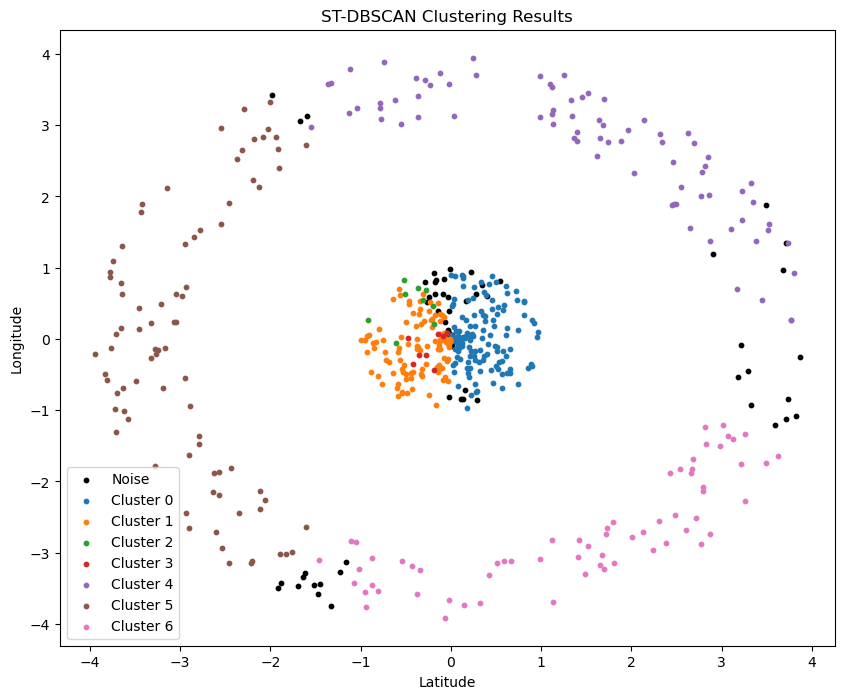

In [394]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stdbscan_clusters(df, stdbscan, lat_col='lat', lon_col='lon'):
    """
    可视化 ST-DBSCAN 聚类结果
    :param df:        DataFrame，包含经纬度等信息
    :param stdbscan:  已经 fit 完的 STDBSCAN 对象
    :param lat_col:   DataFrame 中表示纬度的列名
    :param lon_col:   DataFrame 中表示经度的列名
    """
    # 1) 取出 (lat, lon) 并转换为 NumPy 数组，保证 shape=(n_samples, 2)
    X = df[[lat_col, lon_col]].to_numpy()  
    
    # 2) 取出聚类标签
    labels = stdbscan.labels_
    
    # 3) 获取所有唯一的标签
    unique_labels = np.unique(labels)
    
    # 4) 创建图形
    plt.figure(figsize=(10, 8))
    
    # 5) 分簇绘制
    for label in unique_labels:
        cluster_points = X[labels == label]
        if label == -1:
            # -1 视为噪声
            plt.scatter(
                cluster_points[:, 0],
                cluster_points[:, 1],
                c='black',
                s=10,
                label='Noise'
            )
        else:
            # 其余标签视为正常簇
            plt.scatter(
                cluster_points[:, 0],
                cluster_points[:, 1],
                s=10,
                label=f'Cluster {label}'
            )
    
    # 6) 细节设置
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('ST-DBSCAN Clustering Results')
    plt.legend()
    plt.show()

# ===================== 使用示例 =====================
# 下面这段仅演示如何调用，请根据你的实际变量名替换

# 假设你已经有 df2, 并使用以下列名
# df2.columns => ['lat', 'lon', 'P_Cluster', 'dist', 'mag', ...]

# 假设你的 ST-DBSCAN 已经 fit 完：
# stdbscan = STDBSCAN(eps2=..., min_samples=...)
# X = df2[['lat','lon']].to_numpy()
# T = df2['mag'].to_numpy()
# DL = df2['P_Cluster']
# Rad = df2['dist']
# stdbscan.fit(X, T, DL, Rad)

# 然后直接可视化：
plot_stdbscan_clusters(df, stdbscan, lat_col='lon', lon_col='lat')
